# Bar charts

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

In [3]:
df = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", conn, parse_dates=["timestamp"])

In [4]:
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.day_name()
df["date"] = df["timestamp"].dt.date
df["is_weekend"] = df["weekday"].isin(["Saturday", "Sunday"])


In [5]:
commit_count = df.groupby(["is_weekend", "date", "hour"]).size().reset_index(name = "commit_count")

In [6]:
mean_commit_count = commit_count.groupby(["is_weekend", "hour"])["commit_count"].mean().reset_index(name = "mean")

In [7]:
final_df = mean_commit_count.pivot(index="hour", columns="is_weekend", values = "mean")

In [8]:
full_index = pd.Series(range(0, 24))
final_df = final_df.reindex(full_index)
final_df.rename(axis=1, mapper = {True: "weekend", False: "working_day"}, inplace=True)
final_df.fillna(0, inplace=True)
final_df

is_weekend,working_day,weekend
0,3.000000,2.000000
1,0.000000,6.000000
2,0.000000,0.000000
3,2.000000,1.000000
4,0.000000,0.000000
5,7.500000,2.000000
6,1.500000,0.000000
7,5.166667,4.000000
8,3.700000,7.000000
9,6.000000,3.666667


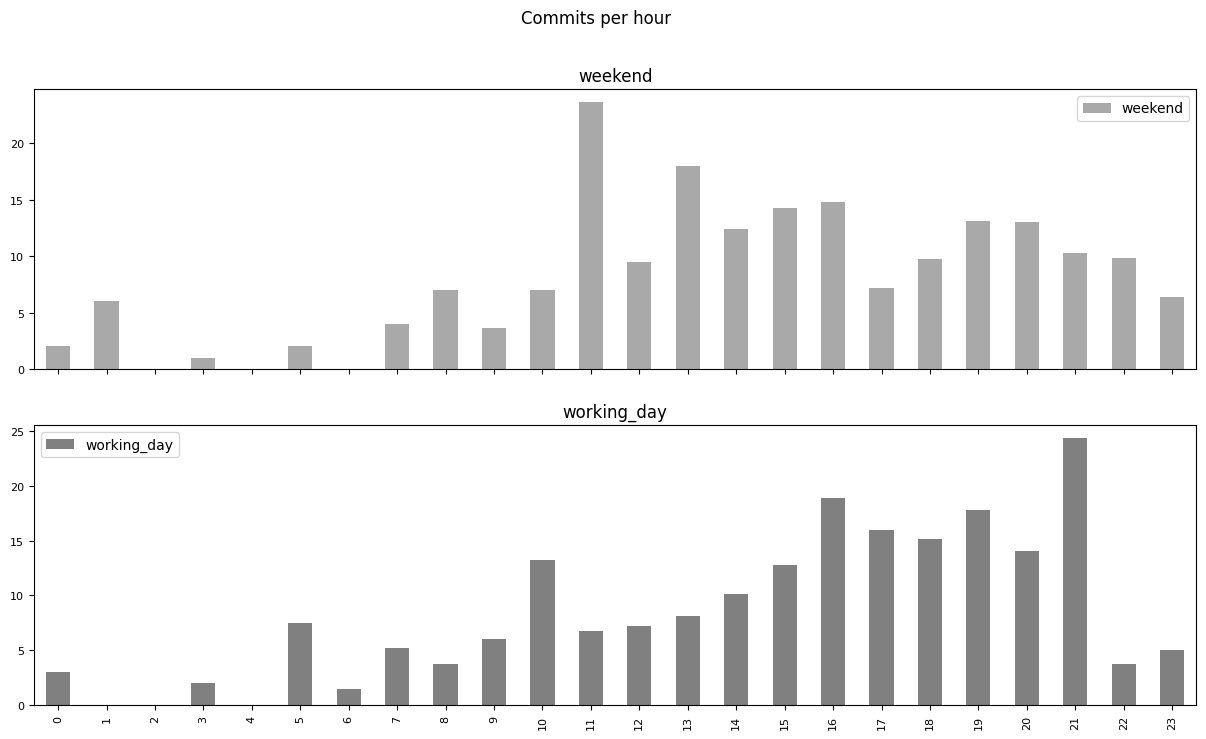

In [9]:
final_df.plot(
            kind = "bar",
            subplots = [["weekend"], ["working_day"]],
            figsize = (15, 8),
            fontsize = 8,
            title = "Commits per hour",
            color = ["gray", "darkgrey"]
            );

Is the dynamic different on working days and weekends?

#### Yes:
    most popular hour on weekend - 11
    most popular hour in working day = 21

In [10]:
conn.close()